In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
path = "/content/optdigits.tra"
data_optdigit = pd.read_csv(path, header = None)
data_optdigit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


In [4]:
X_digits = data_optdigit[np.arange(64)] #Data without class label
Y_digits = data_optdigit[64] #Class Label


##Implementing PCA Algorithm

**Steps:**


1.   Firstly, we standardize the data.
2.   Then, we compute covariance matrix
3.   Next, we find the eigenvalues and eigenvectors for the covariance matrix.
4.   Sort the eigenvalues and select the top k
5.   We create a new matrix containing eigenvectors that map to the k eigenvalues called named as projection matrix(w)
6.   Finally, we obtain the new features (PCA components) by taking the dot product of the data and the projection matrix

### **First Step for PCA**


In [5]:
def feature_normalize(x):
    n = x.shape[1]
    mean = np.zeros((1, n))
    
    # Calculate the mean for each column
    mean = np.mean(x, axis=0)
    
    # For each value normalized
    for i in range(n):
      x.loc[:, i] = (x.loc[:, i] - mean[i])
    return x

### **Second Step for PCA**

Calculate covariance matrix using the following formula:

$S: s_{ij} = \frac{\sum_{t=1}^{N} (x_i^t-m_i)(x_j^t-m_j)}{N}$

And calculate eigenvectors and eigenvalues using this covariance matrix

Then create a class to obtain PCA

In [6]:
class PCA():
    """
    k: Number of components
    w: Projection matrix
    """

    def __init__(self,k):
      self.k = k
      self.eig_vals = None
      self.eig_vecs = None

    def fit(self,x):
      self.mean = np.mean(x, axis = 0)

      #Calculate covariance matrix using formula
      cov_matrix = (x - self.mean).T.dot((x - self.mean)) / (x.shape[0])

      #Calculate eigenvalues and eigenvectors using covariance_matrix
      
      self.eig_vals, self.eig_vecs = np.linalg.eig(cov_matrix)
      self.eig_vecs = self.eig_vecs.T

      #Sorted eigenvalues because we want to choose best eigenvectors
      self.sorted_eig_vals = np.argsort(self.eig_vals)[::-1]

      #Create (kx1) dimensional projection matrix using eigenvectors which is sorted by eigenvalues
      self.w = self.eig_vecs[self.sorted_eig_vals[:self.k]]


    def transform(self,x):
      #Create Principle Components
      return np.dot(x- self.mean, self.w.T)

In [7]:
X = X_digits.copy()

#Standardize X
X_std = feature_normalize(X)

In [8]:
pca_model = PCA(k=2) # k = 2 (we want 2 principle component)
pca_model.fit(X_std)

x_pca = pca_model.transform(X_std)
x_pca

array([[ 12.44580352,   4.71301334],
       [ 16.52024584,  13.07467011],
       [-18.84671433, -10.71445017],
       ...,
       [ 24.11867087,  -5.78704883],
       [ 29.35115567,   3.41363267],
       [-24.993826  , -11.79116904]])

### **Plotting PCA**

In [10]:
## Function for scattering PCA
def plot_scatter(X,Y):
    
    plt.figure(figsize=(10,10))
    colors=['black','blue','purple','yellow','magenta','red','lime','cyan','orange','gray']
      
    for i in range(len(colors)):
      px = X[:,0][Y==i]
      py = X[:,1][Y==i]
      plt.scatter(px,py,c=colors[i])
      
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    
    plt.show()

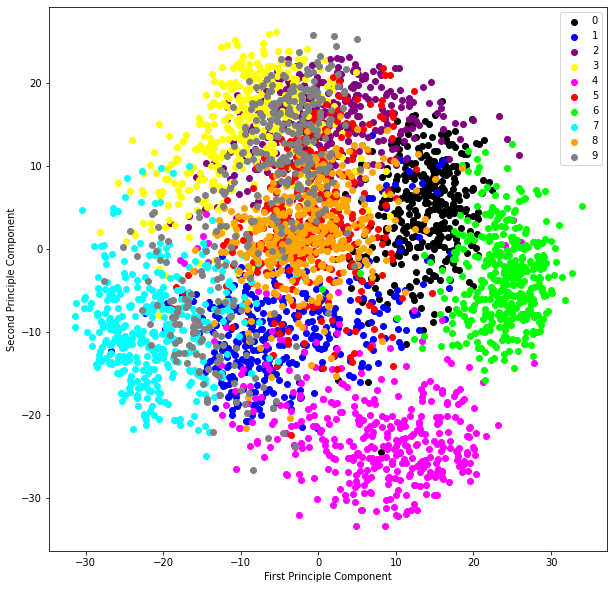

In [12]:
plot_scatter(x_pca,Y_digits)